<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.dropna(inplace=True)

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [10]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [12]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

0.6345070422535211

In [13]:
k_bin= KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')


In [14]:
trf=ColumnTransformer([
    ('trf1',k_bin,[0]),
    ('trf2',k_bin,[1])
])

In [15]:
X_train_trans=trf.fit_transform(X_train)
X_test_trans=trf.transform(X_test)

In [18]:
trf.named_transformers_['trf1'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [19]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trans[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trans[:,1]
})

In [20]:
output

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [22]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['trf1'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['trf2'].bin_edges_[0].tolist())

In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trans,y_train)
y_pred2 = clf.predict(X_test_trans)

In [25]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [26]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6316901408450704

In [30]:
def discretizer(bins,strategy):

  k_bins=KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=strategy)

  trf=ColumnTransformer([
      ('first',k_bins,[0]),
      ('second',k_bins,[1])
  ])

  clf=DecisionTreeClassifier()

  X_trans=trf.fit_transform(X)

  print(np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy')))
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Age'])
  plt.title("Before")

  plt.subplot(122)
  plt.hist(X_trans[:,0],color='red')
  plt.title("After")

  plt.show()


  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Fare'])
  plt.title("Before")

  plt.subplot(122)
  plt.hist(X_trans[:,1],color='red')
  plt.title("After")

  plt.show()

0.6260954616588419


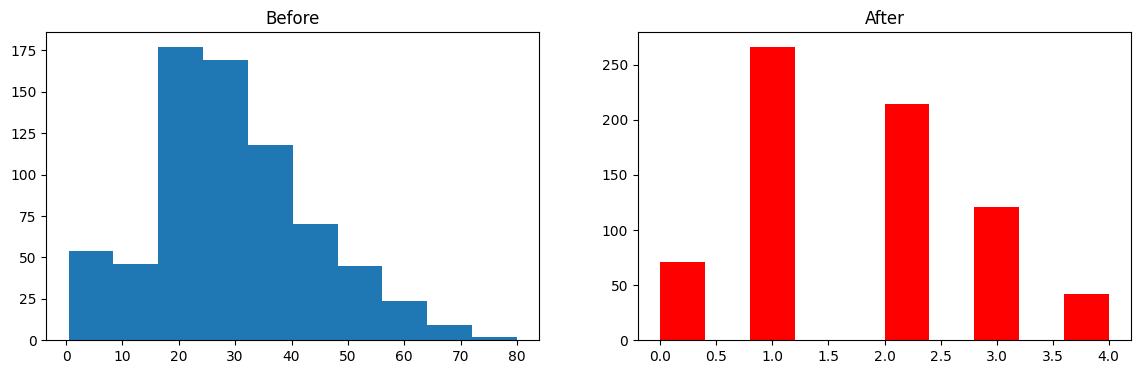

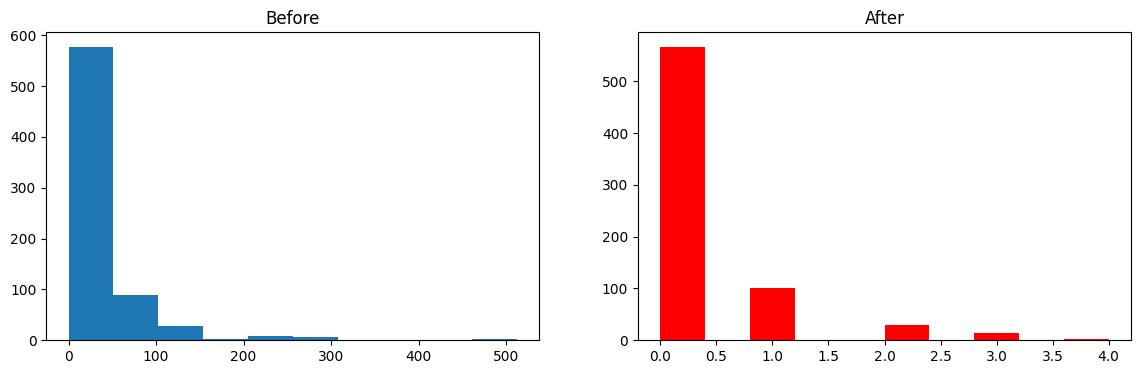

In [31]:
discretizer(5,'kmeans')